In [1]:
from io import StringIO
from Bio import Phylo
import pandas as pd
import pyfaidx
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

First I need to get all of the yellow sequences in one fasta file. I wrote a Python script to do this:

In [3]:
!./scripts/parse_yellow_gtf.py

Now to run an alignment

In [4]:
!./scripts/align_yellow.sh


muscle 5.1.linux64 []  16.2Gb RAM, 4 cores
Built Feb 24 2022 03:16:15
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 14 seqs, avg length 1251, max 2688

00:00 7.8Mb  CPU has 4 cores, running 4 threads
00:12 266Mb   100.0% Calc posteriors0:03 359Mb    25.3% Calc posteriors
00:14 267Mb   100.0% Consistency (1/2)
00:16 267Mb   100.0% Consistency (2/2)
00:16 267Mb   100.0% UPGMA5           
00:19 271Mb   100.0% Refining


In [6]:
!./scripts/yellow_tree.sh

IQ-TREE multicore version 2.0.3 for Linux 64-bit built Dec 20 2020
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    gabe-Macmini (AVX2, FMA3, 15 GB RAM)
Command: iqtree -s /home/gabe/Desktop/mtstp/analysis/data/gene_family_trees/sequences/yellow_gene_family_alignment.fasta
Seed:    34002 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Thu Nov  9 12:36:28 2023
Kernel:  AVX+FMA - 1 threads (4 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 4 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file /home/gabe/Desktop/mtstp/analysis/data/gene_family_trees/sequences/yellow_gene_family_alignment.fasta ... Fasta format detected
Alignment most likely contains DNA/RNA sequences
Alignment has 14 sequences with 3185 columns, 1432 distinct patterns
1057 parsimony-informative, 297 singleton sites, 1831 constant 

Iteration 30 / LogL: -18077.579 / Time: 0h:0m:2s (0h:0m:5s left)
Iteration 40 / LogL: -18079.453 / Time: 0h:0m:2s (0h:0m:4s left)
Iteration 50 / LogL: -18077.662 / Time: 0h:0m:3s (0h:0m:3s left)
Iteration 60 / LogL: -18077.737 / Time: 0h:0m:3s (0h:0m:2s left)
Iteration 70 / LogL: -18079.113 / Time: 0h:0m:4s (0h:0m:1s left)
Iteration 80 / LogL: -18077.483 / Time: 0h:0m:4s (0h:0m:1s left)
Iteration 90 / LogL: -18079.012 / Time: 0h:0m:5s (0h:0m:0s left)
Iteration 100 / LogL: -18078.858 / Time: 0h:0m:5s (0h:0m:0s left)
TREE SEARCH COMPLETED AFTER 102 ITERATIONS / Time: 0h:0m:5s

--------------------------------------------------------------------
|                    FINALIZING TREE SEARCH                        |
--------------------------------------------------------------------
Performs final model parameters optimization
Estimate model parameters (epsilon = 0.010)
1. Initial log-likelihood: -18077.453
2. Current log-likelihood: -18077.436
3. Current log-likelihood: -18077.425
Optimal 

Now I need to plot the expression of these genes 

In [2]:
# load data and analysis metadata
data = pd.read_csv('data/counts_tables/dpl_tpm_counts_kallisto.csv')
data.rename(columns={data.columns[0]: "sample-id" }, inplace = True)
metadata = pd.read_csv('data/mtstp_analysis_metadata.tsv', sep="\t")

#since this analysis will onyl deal with uninfected individuals, I'll filter out all infected samples
uninfected_samples = list(metadata.loc[metadata['infection-status'] != 'infected']['sample-id'])
uninfected_data = data[data['sample-id'].isin(uninfected_samples)]
uninfected_data.set_index("sample-id", inplace = True)

In [3]:
uninfected_data

,lcl|KZ248545.1_cds_OWR45966.1_1,lcl|KZ248545.1_cds_OWR42929.1_2,lcl|KZ248545.1_cds_OWR42930.1_3,lcl|KZ248545.1_cds_OWR42931.1_4,lcl|KZ248545.1_cds_OWR42932.1_5,lcl|KZ248545.1_cds_OWR42933.1_6,lcl|KZ248545.1_cds_OWR42934.1_7,lcl|KZ248545.1_cds_OWR42935.1_8,lcl|KZ248545.1_cds_OWR42936.1_9,lcl|KZ248545.1_cds_OWR51149.1_10,...,lcl|KZ253939.1_cds_OWR46811.1_15223,lcl|KZ253939.1_cds_OWR46812.1_15224,lcl|KZ253939.1_cds_OWR46813.1_15225,lcl|KZ253939.1_cds_OWR46814.1_15226,lcl|KZ253939.1_cds_OWR46815.1_15227,lcl|KZ253939.1_cds_OWR48030.1_15228,lcl|KZ253939.1_cds_OWR48031.1_15229,lcl|KZ253939.1_cds_OWR48032.1_15230,lcl|KZ253939.1_cds_OWR48033.1_15231,lcl|KZ253939.1_cds_OWR55584.1_15232
sample-id,,,,,,,,,,,,,,,,,,,,,
mtstp5iu98,40.307900,56.571700,1108.7200,161.260000,3.714120,1.121030,0.000000,4.427440,80.614100,0.571328,...,7.63375,8.38529,5.12428,1.773930,0.788076,0.011144,21.51140,25.0025,0.000000,0.857986
mtstp3cu2,117.197000,158.977000,473.1770,50.214300,51.896000,1.055150,0.024980,3.666070,47.019600,1.520990,...,15.86870,12.53940,48.76550,3.593860,1.226600,0.291278,29.57810,105.5880,0.000000,8.049470
mtstp5cu17,53.580300,72.488100,847.3960,143.629000,6.129130,0.000000,0.000000,1.789000,68.445200,1.173910,...,8.82507,8.81382,4.24864,0.897578,0.765841,0.000000,31.69200,76.7036,0.000000,2.985790
mtstpLiu130,0.036026,0.000000,750.5200,3.536750,3.418260,0.629009,0.000000,0.529960,1.137820,11.142000,...,13.34150,5.86868,133.43200,1.111620,1.160870,0.006044,55.27390,130.0230,0.000000,0.239330
mtstpLiu133,0.025680,0.091779,439.9790,8.929790,2.229130,2.650270,1.432950,2.357130,0.270234,8.235870,...,11.09360,5.79064,146.81100,1.351020,1.207460,0.025850,38.63890,70.4854,0.000000,0.000000
mtstpEcu38,0.000000,0.011409,205.2790,0.678483,4.695950,0.953417,0.020652,0.044239,0.000000,6.483220,...,9.24495,12.27980,355.74000,3.540060,1.861930,0.008570,44.80340,223.3030,0.717028,2.056850
mtstpAiu148,20.759100,32.852500,879.6510,6.046150,6.695500,0.369350,0.351016,5.922370,4.350970,66.263500,...,34.54550,4.44715,39.52500,1.589870,1.345300,0.131708,23.62360,65.2631,0.000000,0.374311
mtstp5iu100,32.551700,40.219300,1100.9300,173.425000,5.561670,1.156950,0.000000,2.484970,86.955500,1.052060,...,9.33069,8.27777,9.11512,1.463130,0.947899,0.000000,26.54300,54.4123,0.000000,0.933983
mtstpLiu131,1.578640,1.649300,1298.7200,9.646060,0.334944,0.417812,0.834579,7.058230,2.366580,19.060900,...,21.34560,2.39756,138.19300,0.970659,0.904959,0.000000,16.73580,79.4092,0.000000,0.106698


In [3]:
#get sequence ids
sequences = pyfaidx.Fasta('/home/gabe/Desktop/mtstp/analysis/data/gene_family_trees/sequences/yellow_gene_family_sequences.fasta')
sequence_ids = list(sequences.keys())

#initialize dataframe to store yellow info
yellow_df = pd.DataFrame(index=uninfected_data.index)

#list to store ids
gene_ids = []
#get only columns that are the right sequences
for sequence_id in sequence_ids:
    gene_ids.append(sequence_id)
    
#keep specific columns
for column in list(uninfected_data.columns):
    #check if column name contains a target id
    for target_id in gene_ids:
        id = target_id.split('_')[1]
        if id in column:
            data = uninfected_data[column]
            yellow_df[target_id] = data
            
#add metadata
plant = []
stage = []

for sample in (yellow_df.index):
    if sample[6] == 'i':
        plant.append('A. incarnata')
    elif sample[6] == 'c':
        plant.append('A. curassavica')
        
    if sample[5] == '3':
        stage.append('third-instar')
    elif sample[5] == '5':
        stage.append('fifth-instar')
    elif sample[5] == 'E':
        stage.append('early-pupa')
    elif sample[5] == 'L':
        stage.append('late-pupa')
    elif sample[5] == 'A':
        stage.append('adult')
        
yellow_df['Plant'] = plant
yellow_df['Stage'] = stage

#sort data by stage
#sort data by developmental stage
dev_stages = ['third-instar', 'fifth-instar', 'early-pupa', 'late-pupa', 'adult']


yellow_df['Stage'] = pd.Categorical(yellow_df['Stage'], categories = dev_stages)
yellow_df = yellow_df.sort_values(by='Stage')


In [6]:
yellow_df

,yellow_OWR43022.1,yellow-h3_OWR44676.1,yellow-d_OWR44678.1,yellow-d_OWR46670.1,yellow-d_OWR46671.1,yellow-d_OWR46346.1,yellow-e_OWR46347.1,yellow-e_OWR54077.1,yellow-c_OWR54736.1,yellow-b_OWR52082.1,yellow-c_OWR50692.1,yellow-x_OWR52749.1,yellow-f4_OWR43338.1,yellow-f4_OWR44954.1,Plant,Stage
sample-id,,,,,,,,,,,,,,,,
mtstp3iu81,0.116969,1.082690,0.547425,2.417300,1.442760,34.30310,0.822827,0.941278,7.08453,32.6852,0.193797,10.79690,28.53160,4.915320,A. incarnata,third-instar
mtstp3cu2,0.095074,1.174860,0.000000,0.000000,0.098414,56.46740,0.936113,0.607504,8.02910,38.2421,0.188987,9.73651,30.98400,6.550430,A. curassavica,third-instar
mtstp3iu85,9.900630,8.806550,0.000000,0.000000,0.000000,8.52862,2.555450,7.226780,9.02220,39.1548,0.124731,47.19330,5.91563,5.225220,A. incarnata,third-instar
mtstp3cu5,0.260021,0.311751,0.572102,0.363513,0.076912,34.28740,0.683687,0.343385,6.88282,45.1617,0.148210,6.78302,18.88620,5.412760,A. curassavica,third-instar
mtstp3cu4,0.060734,0.288493,0.000000,0.274148,0.041915,29.90290,0.629650,1.093530,4.88129,40.6752,0.201719,8.52773,29.02030,7.145520,A. curassavica,third-instar
mtstp3cu3,0.108483,2.031880,0.054658,0.728216,0.955724,40.03340,0.540948,1.504130,7.88956,39.1943,0.000000,11.05860,29.76630,7.917970,A. curassavica,third-instar
mtstp3cu8,0.024528,0.602452,0.061804,0.587246,0.101529,53.05890,0.339855,0.347056,15.89770,50.3697,0.193419,8.83006,30.37210,7.497540,A. curassavica,third-instar
mtstp3iu83,0.109543,1.248400,0.000000,0.971735,0.352282,40.06730,0.620062,1.059150,6.11029,29.8847,0.262138,10.35820,29.13430,6.775430,A. incarnata,third-instar
mtstp3iu82,0.182592,1.394660,0.000000,0.102971,0.047254,38.50110,0.193147,1.232320,9.00480,31.5089,0.090864,9.37773,29.62100,7.173190,A. incarnata,third-instar


In [4]:
#assemble data frames
df_by_gene = {}

for gene in list(yellow_df.columns):
    gene_df = yellow_df[[gene, 'Plant', 'Stage']]
    df_by_gene[gene] = gene_df

/tmp/ipykernel_35405/2941755095.py:165: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
/tmp/ipykernel_35405/2941755095.py:166: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
/tmp/ipykernel_35405/2941755095.py:167: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
/tmp/ipykernel_35405/2941755095.py:168: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
/tmp/ipykernel_35405/2941755095.py:169: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
/tmp/ipykernel_35405/2941755095.py:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
/tmp

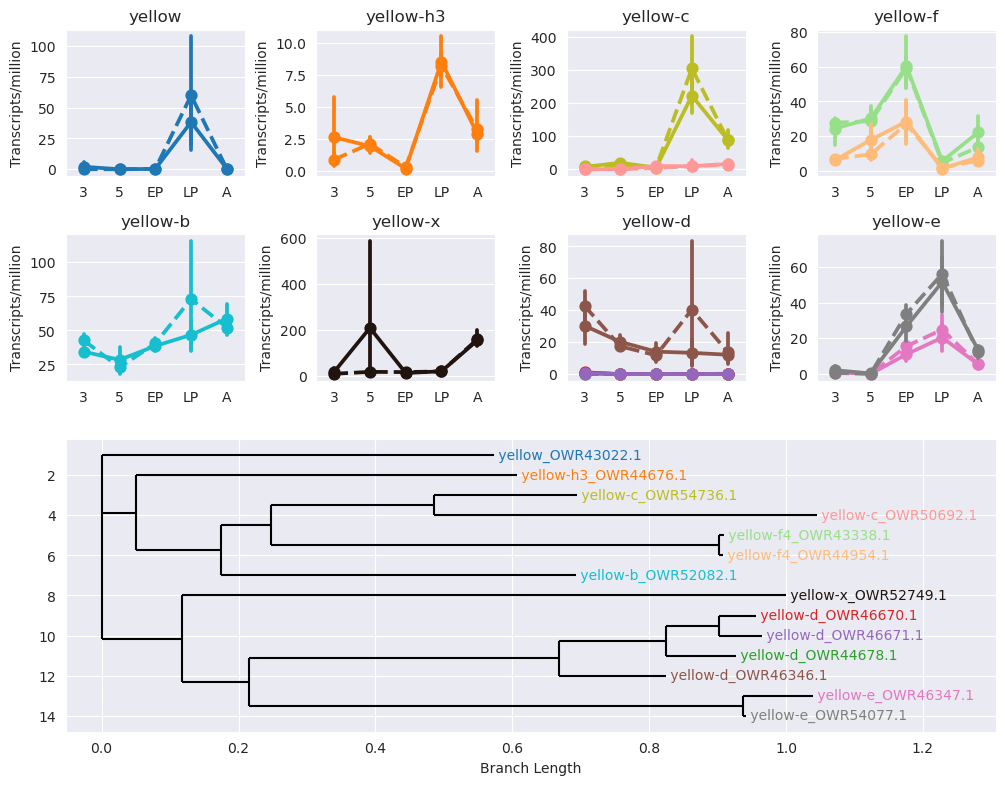

<Figure size 640x480 with 0 Axes>

In [8]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(3, 4, height_ratios=[1, 1, 2], hspace=0.3)

# Create the first 8 subplots
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])
ax4 = plt.subplot(gs[0, 3])
ax5 = plt.subplot(gs[1, 0])
ax6 = plt.subplot(gs[1, 1])
ax7 = plt.subplot(gs[1, 2])
ax8 = plt.subplot(gs[1, 3])

# Create the additional subplot at the bottom
ax_bottom = plt.subplot(gs[2, :])


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896', '#21130d', '#98df8a', '#ffbb78']
custom_palette = sns.color_palette(colors)

#yellow_OWR43022.1 plot
sns.pointplot(x='Stage', y='yellow_OWR43022.1', 
              data=df_by_gene['yellow_OWR43022.1'].loc[df_by_gene['yellow_OWR43022.1']['Plant'] == 'A. incarnata'], 
              color='tab:blue', ax=ax1, legend=False)
sns.pointplot(x='Stage', y='yellow_OWR43022.1', 
              data=df_by_gene['yellow_OWR43022.1'].loc[df_by_gene['yellow_OWR43022.1']['Plant'] == 'A. curassavica'], 
              color='tab:blue', ax=ax1, legend=False, linestyle='--')
ax1.set_xlabel('')
ax1.set_ylabel('Transcripts/million')
ax1.set_title('yellow')
ax1.set_xticklabels([])

#yellow-h3_OWR44676.1 plot
sns.pointplot(x='Stage', y='yellow-h3_OWR44676.1', 
              data=df_by_gene['yellow-h3_OWR44676.1'].loc[df_by_gene['yellow-h3_OWR44676.1']['Plant'] == 'A. incarnata'], 
              color='tab:orange', ax=ax2, legend=False)
sns.pointplot(x='Stage', y='yellow-h3_OWR44676.1', 
              data=df_by_gene['yellow-h3_OWR44676.1'].loc[df_by_gene['yellow-h3_OWR44676.1']['Plant'] == 'A. curassavica'], 
              color='tab:orange', ax=ax2, legend=False, linestyle='--')
ax2.set_xlabel('')
ax2.set_ylabel('Transcripts/million')
ax2.set_title('yellow-h3')
ax2.set_xticklabels([])

#yellow-c
#yellow-c_OWR54736.1
sns.pointplot(x='Stage', y='yellow-c_OWR54736.1', 
              data=df_by_gene['yellow-c_OWR54736.1'].loc[df_by_gene['yellow-c_OWR54736.1']['Plant'] == 'A. incarnata'], 
              color='tab:olive', ax=ax3, legend=False)
sns.pointplot(x='Stage', y='yellow-c_OWR54736.1',
              data=df_by_gene['yellow-c_OWR54736.1'].loc[df_by_gene['yellow-c_OWR54736.1']['Plant'] == 'A. curassavica'], 
              color='tab:olive', ax=ax3, legend=False, linestyle='--')
#yellow-c_OWR50692.1
sns.pointplot(x='Stage', y='yellow-c_OWR50692.1', 
              data=df_by_gene['yellow-c_OWR50692.1'].loc[df_by_gene['yellow-c_OWR50692.1']['Plant'] == 'A. incarnata'], 
              color=colors[10], ax=ax3, legend=False)
sns.pointplot(x='Stage', y='yellow-c_OWR50692.1',
              data=df_by_gene['yellow-c_OWR50692.1'].loc[df_by_gene['yellow-c_OWR50692.1']['Plant'] == 'A. curassavica'], 
              color=colors[10], ax=ax3, legend=False, linestyle='--')
ax3.set_xlabel('')
ax3.set_ylabel('Transcripts/million')
ax3.set_title('yellow-c')
ax3.set_xticklabels([])

#yellow-f
#yellow-f4_OWR43338.1
sns.pointplot(x='Stage', y='yellow-f4_OWR43338.1', 
              data=df_by_gene['yellow-f4_OWR43338.1'].loc[df_by_gene['yellow-f4_OWR43338.1']['Plant'] == 'A. incarnata'], 
              color=colors[12], ax=ax4, legend=False)
sns.pointplot(x='Stage', y='yellow-f4_OWR43338.1',
              data=df_by_gene['yellow-f4_OWR43338.1'].loc[df_by_gene['yellow-f4_OWR43338.1']['Plant'] == 'A. curassavica'], 
              color=colors[12], ax=ax4, legend=False, linestyle='--')
#yellow-f4_OWR44954.1
sns.pointplot(x='Stage', y='yellow-f4_OWR44954.1', 
              data=df_by_gene['yellow-f4_OWR44954.1'].loc[df_by_gene['yellow-f4_OWR44954.1']['Plant'] == 'A. incarnata'], 
              color=colors[13], ax=ax4, legend=False)
sns.pointplot(x='Stage', y='yellow-f4_OWR44954.1',
              data=df_by_gene['yellow-f4_OWR44954.1'].loc[df_by_gene['yellow-f4_OWR44954.1']['Plant'] == 'A. curassavica'], 
              color=colors[13], ax=ax4, legend=False, linestyle='--')

ax4.set_xlabel('')
ax4.set_ylabel('Transcripts/million')
ax4.set_title('yellow-f')
ax4.set_xticklabels([])

#yellow-b_OWR52082.1
sns.pointplot(x='Stage', y='yellow-b_OWR52082.1', 
              data=df_by_gene['yellow-b_OWR52082.1'].loc[df_by_gene['yellow-b_OWR52082.1']['Plant'] == 'A. incarnata'], 
              color=colors[9], ax=ax5, legend=False)
sns.pointplot(x='Stage', y='yellow-b_OWR52082.1',
              data=df_by_gene['yellow-b_OWR52082.1'].loc[df_by_gene['yellow-b_OWR52082.1']['Plant'] == 'A. curassavica'], 
              color=colors[9], ax=ax5, legend=False, linestyle='--')
ax5.set_xlabel('')
ax5.set_ylabel('Transcripts/million')
ax5.set_title('yellow-b')

#yellow-x_OWR52749.1
sns.pointplot(x='Stage', y='yellow-x_OWR52749.1', 
              data=df_by_gene['yellow-x_OWR52749.1'].loc[df_by_gene['yellow-x_OWR52749.1']['Plant'] == 'A. incarnata'], 
              color=colors[11], ax=ax6, legend=False)
sns.pointplot(x='Stage', y='yellow-x_OWR52749.1',
              data=df_by_gene['yellow-x_OWR52749.1'].loc[df_by_gene['yellow-x_OWR52749.1']['Plant'] == 'A. curassavica'], 
              color=colors[11], ax=ax6, legend=False, linestyle='--')
ax6.set_xticklabels([])
ax6.set_xlabel('')
ax6.set_ylabel('Transcripts/million')
ax6.set_title('yellow-x')


#yellow-d
#yellow-d_OWR44678.1
sns.pointplot(x='Stage', y='yellow-d_OWR44678.1', 
              data=df_by_gene['yellow-d_OWR44678.1'].loc[df_by_gene['yellow-d_OWR44678.1']['Plant'] == 'A. incarnata'], 
              color=colors[2], ax=ax7, legend=False)
sns.pointplot(x='Stage', y='yellow-d_OWR44678.1',
              data=df_by_gene['yellow-d_OWR44678.1'].loc[df_by_gene['yellow-d_OWR44678.1']['Plant'] == 'A. curassavica'], 
              color=colors[2], ax=ax7, legend=False, linestyle='--')
#yellow-d_OWR46670.1
sns.pointplot(x='Stage', y='yellow-d_OWR46670.1', 
              data=df_by_gene['yellow-d_OWR46670.1'].loc[df_by_gene['yellow-d_OWR46670.1']['Plant'] == 'A. incarnata'], 
              color=colors[3], ax=ax7, legend=False)
sns.pointplot(x='Stage', y='yellow-d_OWR46670.1',
              data=df_by_gene['yellow-d_OWR46670.1'].loc[df_by_gene['yellow-d_OWR46670.1']['Plant'] == 'A. curassavica'], 
              color=colors[3], ax=ax7, legend=False, linestyle='--')
#yellow-d_OWR46671.1
sns.pointplot(x='Stage', y='yellow-d_OWR46671.1', 
              data=df_by_gene['yellow-d_OWR46671.1'].loc[df_by_gene['yellow-d_OWR46671.1']['Plant'] == 'A. incarnata'], 
              color=colors[4], ax=ax7, legend=False)
sns.pointplot(x='Stage', y='yellow-d_OWR46671.1',
              data=df_by_gene['yellow-d_OWR46671.1'].loc[df_by_gene['yellow-d_OWR46671.1']['Plant'] == 'A. curassavica'], 
              color=colors[4], ax=ax7, legend=False, linestyle='--')
#yellow-d_OWR46346.1
sns.pointplot(x='Stage', y='yellow-d_OWR46346.1', 
              data=df_by_gene['yellow-d_OWR46346.1'].loc[df_by_gene['yellow-d_OWR46346.1']['Plant'] == 'A. incarnata'], 
              color=colors[5], ax=ax7, legend=False)
sns.pointplot(x='Stage', y='yellow-d_OWR46346.1',
              data=df_by_gene['yellow-d_OWR46346.1'].loc[df_by_gene['yellow-d_OWR46346.1']['Plant'] == 'A. curassavica'], 
              color=colors[5], ax=ax7, legend=False, linestyle='--')
ax7.set_xticklabels([])
ax7.set_xlabel('')
ax7.set_ylabel('Transcripts/million')
ax7.set_title('yellow-d')

#yellow-e
#yellow-e_OWR46347.1
sns.pointplot(x='Stage', y='yellow-e_OWR46347.1', 
              data=df_by_gene['yellow-e_OWR46347.1'].loc[df_by_gene['yellow-e_OWR46347.1']['Plant'] == 'A. incarnata'], 
              color=colors[6], ax=ax8, legend=False)
sns.pointplot(x='Stage', y='yellow-e_OWR46347.1',
              data=df_by_gene['yellow-e_OWR46347.1'].loc[df_by_gene['yellow-e_OWR46347.1']['Plant'] == 'A. curassavica'], 
              color=colors[6], ax=ax8, legend=False, linestyle='--')
#yellow-e_OWR54077.1
sns.pointplot(x='Stage', y='yellow-e_OWR54077.1', 
              data=df_by_gene['yellow-e_OWR54077.1'].loc[df_by_gene['yellow-e_OWR54077.1']['Plant'] == 'A. incarnata'], 
              color=colors[7], ax=ax8, legend=False)
sns.pointplot(x='Stage', y='yellow-e_OWR54077.1',
              data=df_by_gene['yellow-e_OWR54077.1'].loc[df_by_gene['yellow-e_OWR54077.1']['Plant'] == 'A. curassavica'], 
              color=colors[7], ax=ax8, legend=False, linestyle='--')
ax8.set_xticklabels([])
ax8.set_xlabel('')
ax8.set_ylabel('Transcripts/million')
ax8.set_title('yellow-e')

ax1.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
ax2.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
ax3.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
ax4.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
ax5.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
ax6.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
ax7.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])
ax8.set_xticklabels(['3', '5', 'EP', 'LP', 'A'])

#add phylogeny
plt.subplots_adjust(bottom=0.1, hspace=0.3, wspace=0.4)
genes = list(yellow_df.columns)[0:-2]
legend_map = dict(zip(genes, colors))

#load and plot phylogenetic tree
tree = Phylo.read("/home/gabe/Desktop/mtstp/analysis/data/gene_family_trees/sequences/yellow_gene_family_alignment.fasta.treefile", "newick")
#tree.root_with_outgroup({"name": "yellow_OWR43022.1"})
tree.rooted = True
#ax_bottom = plt.subplot(2, 1, 2)
Phylo.draw(tree, axes=ax_bottom, label_colors=legend_map)

plt.tight_layout()
fig.savefig('../figures/yellow_gene_families.pdf')
